In [3]:
from scipy import stats
import numpy as np
import pandas as pd 
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import datetime as dt
from datetime import datetime, time, date
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

In [258]:
test= pd.read_csv('data_FINAL')

In [139]:
# test.columns

In [138]:
# t= pd.get_dummies(test['event_id'], prefix='event_id')

In [263]:
for n in ['swim','t1','bike','t2','run','total_time']:
    test[n] = pd.to_timedelta(test[n])/pd.Timedelta(minutes=1)

In [136]:
# s= test['swim']
# r=test['run']
# b=test['bike']
# frames=[s,t]
# framer=[r,t]
# frameb=[b,t]
# frame_t=[s,r,b,t]

In [135]:
# test= test.fillna(0)


In [134]:
# total.describe()

In [133]:
# swim= pd.concat(frames, axis=1)
# run=pd.concat(framer,axis=1)
# bike= pd.concat(frameb, axis=1)
# total= pd.concat(frame_t,axis=1)

In [132]:
# _list=[]
# for i in swim.columns:
#     if i !='swim':
#         _list.append(i)
    



In [131]:
# X=swim[_list]
# y=swim['swim']
# X_train,X_test,y_train,y_test= train_test_split(X,y)

In [130]:
# def plot_feature_importances(model):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(100,100))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), X_train.columns.values) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")


In [129]:

# gbrt = GradientBoostingRegressor(random_state=0)
# gbrt.fit(X_train, y_train)
# y_predict_gb= gbrt.predict(X_test)

# print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [128]:
# plot_feature_importances(gbrt)

In [127]:
# forest = DecisionTreeRegressor()
# forest.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [126]:
# plot_feature_importances(forest)

In [125]:
# X=run[_list]
# y=run['run']
# X_train,X_test,y_train,y_test= train_test_split(X,y)

In [124]:
# gbrt = GradientBoostingRegressor(random_state=0)
# gbrt.fit(X_train, y_train)
# y_predict_gb= gbrt.predict(X_test)

# print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [123]:
# plot_feature_importances(gbrt)

In [122]:
# forest = DecisionTreeRegressor()
# forest.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [121]:
# plot_feature_importances(forest)

In [120]:
# X=run[_list]
# y=bike['bike']
# X_train,X_test,y_train,y_test= train_test_split(X,y)

In [119]:
# gbrt = GradientBoostingRegressor(random_state=0)
# gbrt.fit(X_train, y_train)
# y_predict_gb= gbrt.predict(X_test)

# print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [118]:
# plot_feature_importances(gbrt)

In [116]:
# forest = DecisionTreeRegressor()
# forest.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

In [117]:
# plot_feature_importances(gbrt)

In [115]:
# total['121384']

In [265]:
# test= test.drop('Unnamed: 0', axis=1 )

In [266]:
test['pct_swim']=test['swim']/test ['total_time']


In [267]:
test['pct_bike']=test['bike']/test['total_time']


In [268]:
test['pct_run']= test['run']/test['total_time']


In [269]:
test['pct_trans']= (test['t1']+test['t2'])/test['total_time']

In [270]:
test['age']= 2018- test['athlete_yob']

In [271]:
test= test.fillna(0)

In [511]:
sum(test['over_total']== False)

1285

In [273]:
len(test['event_id'].unique())

215

In [274]:
mean = test['total_time'].groupby(test['age']).mean()
mean_swim = test['swim'].groupby(test['age']).mean()
mean_bike = test['bike'].groupby(test['age']).mean()
mean_run = test['run'].groupby(test['age']).mean()
mean_tran= (test['t1']+test['t2']).groupby(test['age']).mean()

In [275]:
frame = [mean, mean_swim, mean_bike, mean_run, mean_tran]


In [276]:
mean = pd.DataFrame(frame)


In [277]:
mean = mean.T


In [278]:
mean= mean.rename(columns = {'total_time':'mean_total', 'swim':'mean_swim','bike':'mean_bike','run':'mean_run','Unnamed 0':'mean_tran'})

In [279]:
mean.to_csv('average_times')

In [280]:
happy = mean.merge(test, on='age')
    

In [281]:
happy= happy[['age','mean_total','mean_swim','mean_bike','mean_run','mean_tran','swim','run','bike','total_time','total_tran']]

In [459]:
# over_total=[]
# =[]
# over_bike=[]
# over_run=[]
# over_tran=[]


test['over_total'] = [i for i in happy['total_time']> happy['mean_total']]
test['over_swim'] = [i for i in happy['swim']> happy['mean_swim']]
test['over_bike'] = [i for i in happy['bike']> happy['mean_bike']]
test['over_run'] = [i for i in happy['run']> happy['mean_run']]
test['over_tran'] = [i for i in happy['total_tran']> happy['mean_tran']]

In [289]:
 test[['over_total','over_swim','over_bike','over_run','over_tran']]= test[['over_total','over_swim','over_bike','over_run','over_tran']].astype(int)

In [559]:
test.to_csv('final_categorical')

In [458]:
 test.dtypes

total_time                      float64
athlete_categories               object
athlete_country_id                int64
athlete_yob                       int64
coach                             int64
current_rankings                  int64
higher_education                  int64
hobbies                           int64
injuries                         object
languages_spoken                  int64
marital_status                   object
occupation                       object
sponsors                         object
spouse_children                  object
weight                            int64
finish_percentage               float64
race_finishes                     int64
race_podium_percentage          float64
race_podiums                      int64
race_starts                       int64
race_wins                         int64
event_country_id                  int64
event_date                       object
event_id                          int64
event_latitude                  float64


In [454]:
test['over_total']= test['over_total'].astype('category')

In [328]:
_list=[]
for i in test.columns: 
    if i !=['over_total']:
        _list.append(i)
_list= _list[:-5]

In [512]:
## categorical regression
X=test[['athlete_country_id', 'athlete_yob', 'coach',
       'current_rankings', 'higher_education', 'hobbies',
       'languages_spoken' , 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins', 'event_latitude',
       'event_longitude', 'event_region_id', 'headers_count', 'position',
       'prog_id', 'result_id', 'bike_m','swim_m', 'run_m', 't1_s', 't2_s', 'total_tran', 'higher_education_1',
       'hobbies_1', 'injuries_1', 'languages_spoken_1', 'marital_status_1',
       'occupation_1', 'sponsors_1', 'spouse_children_1', 'athlete_country_id', 'event_country_id', 'event_id',
       'athlete_categories_[39, 42]', 'athlete_categories_[39]',
       'athlete_categories_[40, 42]', 'athlete_categories_[40]',
       'athlete_categories_[42]', 'athlete_gender_female',
       'athlete_gender_male', 'injuries_0', 'injuries_achilles',
       'injuries_broken_leg', 'injuries_collarbone', 'injuries_face_scar',
       'injuries_knee', 'injuries_stress_fracture','over_swim','over_bike','over_run','over_tran']]


y=test['over_total']
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression

In [2]:
kfold= KFold(n_splits=4)

NameError: name 'KFold' is not defined

In [514]:
clf= LogisticRegression()
clf.fit(X_train,y_train)
y_hat_test = clf.predict(X_test)
y_score =clf.decision_function(X_test)
print("Training set score:\n{:.2f}".format(clf.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(clf.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(clf,X,y, cv=kfold).mean()))

Training set score:
0.64
Test set score:
0.67
Mean cross-validation score:
0.65


In [1]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix( y_hat_test,y_test)

print('Confusion Matrix:\n',cnf_matrix)

NameError: name 'y_hat_test' is not defined

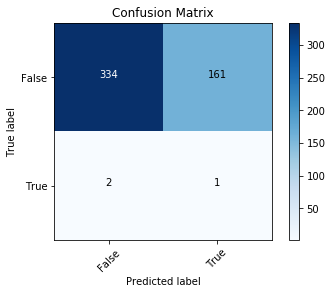

In [516]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

# Random Forest 


In [538]:
rforest= RandomForestClassifier(criterion= 'entropy',max_depth= 6,min_samples_leaf=1,min_samples_split=20,n_estimators= 100)
rforest.fit(X_train,y_train)
y_hat_test = rforest.predict(X_test)
print("Training set score:\n{:.2f}".format(rforest.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(rforest.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(rforest,X,y, cv=KFold(n_splits=15, shuffle= True, random_state=0)).mean()))

Training set score:
0.96
Test set score:
0.95
Mean cross-validation score:
0.95


In [539]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2,5,10,15, 20],
    'min_samples_leaf': [1, 2, 5]
}

rf_grid_search = GridSearchCV(rforest, rf_param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [540]:
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = rf_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(rf_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(rf_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 95.2%
Mean Testing Score: 95.58%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 100}

Confusion Matrix:
 [[323  11]
 [ 13 151]]


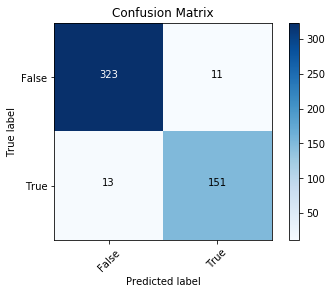

In [541]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)

print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

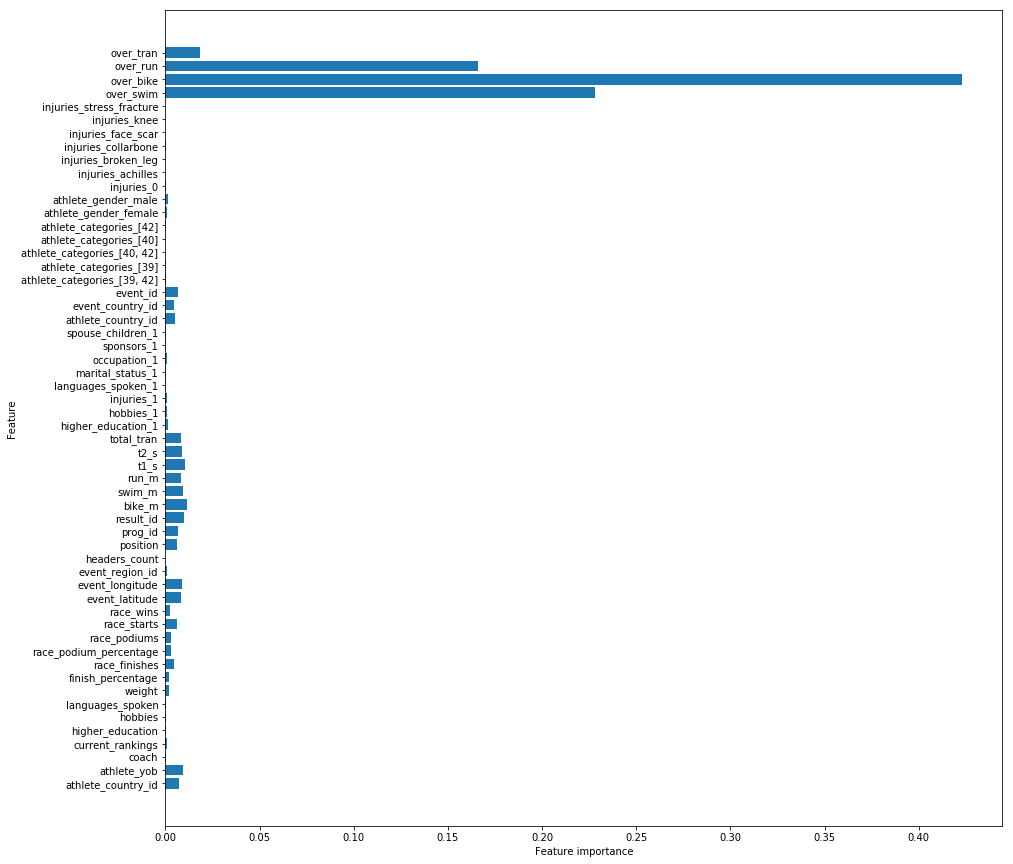

In [542]:
plot_feature_importances(rforest)

# Gradient Boost 


In [551]:
grbst= GradientBoostingClassifier(learning_rate= 0.01,max_depth= 2,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 10)
grbst.fit(X_train,y_train)
y_hat_test = grbst.predict(X_test)
print("Training set score:{:.3f}".format(grbst.score(X_train,y_train)))
print("Test set score:{:.3f}".format(grbst.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(grbst,X,y, cv=kfold).mean()))

Training set score:0.636
Test set score:0.675
Mean cross-validation score:
0.65


In [552]:
#Gradient Boost
gb_param_grid = {'n_estimators': [10],
                  'learning_rate':[0.001, 0.01,0.1,1],
                  'max_depth': [2,4,20],
                  'min_samples_leaf': range(2, 20, 8),
                  'min_samples_split': range(2, 10, 2),
                  #'max_features': range(1, len(X.columns)+1)
                }

In [553]:
gb_grid_search = GridSearchCV(grbst, gb_param_grid, cv=3, return_train_score=True)
gb_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [2, 4, 20], 'min_samples_leaf': range(2, 20, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [554]:
gb_gs_training_score = np.mean(gb_grid_search.cv_results_['mean_train_score'])
gb_gs_testing_score = gb_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(gb_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(gb_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
gb_grid_search.best_params_


Mean Training Score: 80.83%
Mean Testing Score: 94.88%
Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

Confusion Matrix:
 [[336 162]
 [  0   0]]


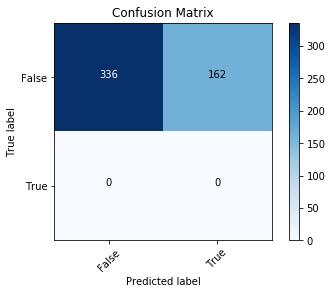

In [555]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [556]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


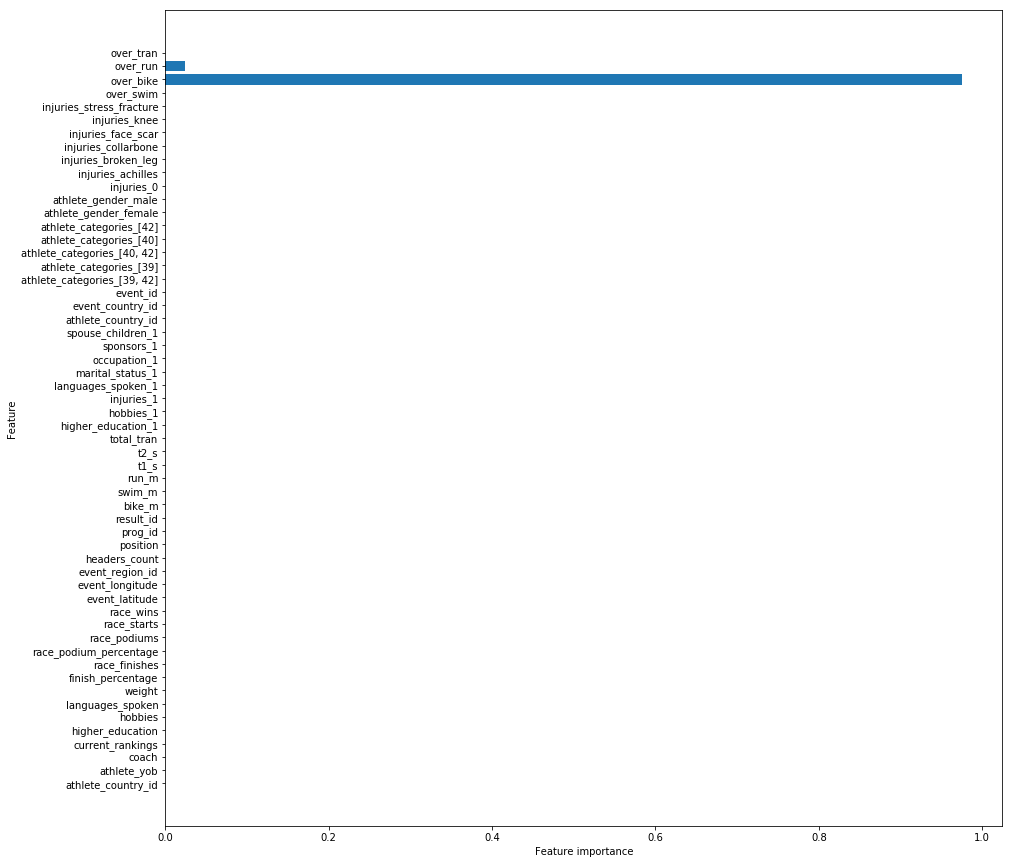

In [557]:
plot_feature_importances(grbst)